<a href="https://colab.research.google.com/github/noha2002/noha/blob/main/classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [25]:
dataset = pd.read_csv('loan_test.csv')

In [18]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360,Urban


In [27]:
len(dataset)

367

In [28]:
dataset.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,3.670000e+02,3.670000e+02,3.670000e+02,361.000000,338.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.537396,0.825444
std,4.910685e+05,2.334232e+05,6.296143e+06,65.156643,0.380150
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.000000
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000,1.000000
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000,1.000000
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000,1.000000
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000,1.000000


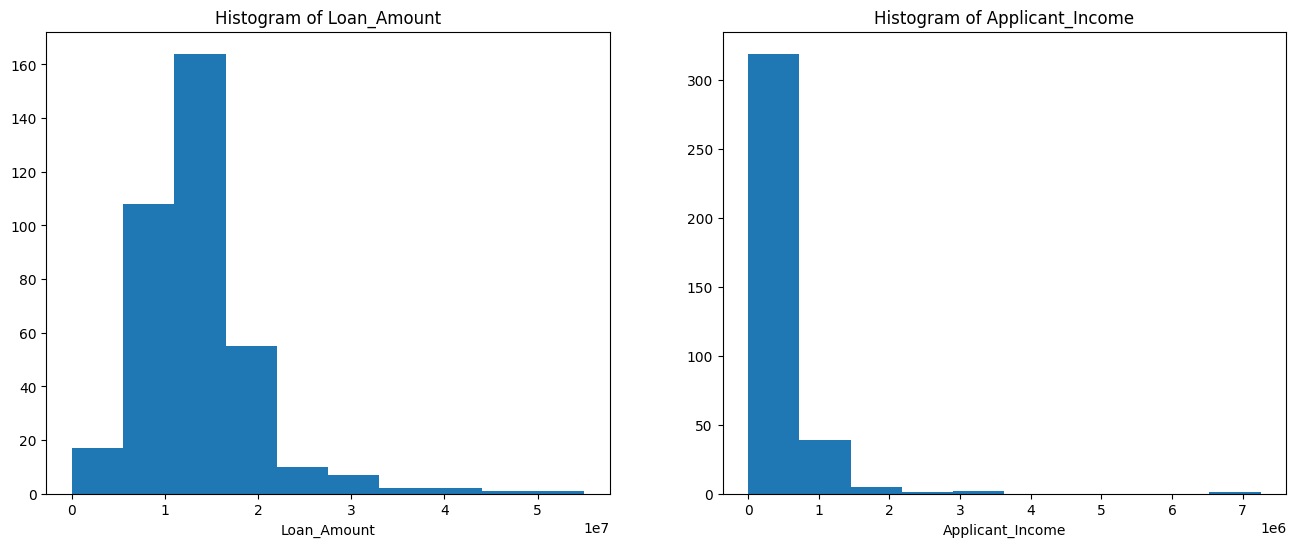

In [29]:
fig = plt.figure(figsize=(16, 6))
Loan_Amount = fig.add_subplot(121)
Applicant_Income = fig.add_subplot(122)

Loan_Amount.hist(dataset.Loan_Amount, bins=10)
Loan_Amount.set_xlabel('Loan_Amount')
Loan_Amount.set_title("Histogram of Loan_Amount")

Applicant_Income.hist(dataset.Applicant_Income, bins=10)
Applicant_Income.set_xlabel('Applicant_Income')
Applicant_Income.set_title("Histogram of Applicant_Income")

plt.show()


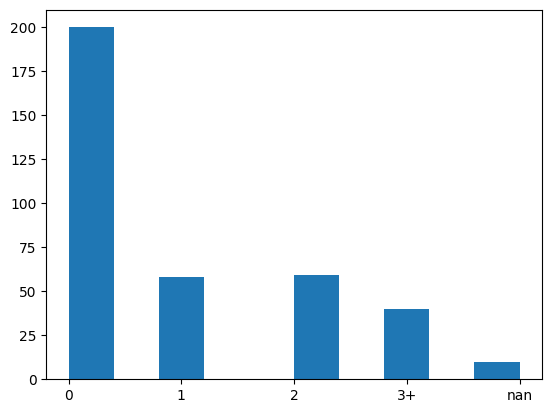

In [30]:
import matplotlib.pyplot as plt

dataset['Dependents'] = dataset['Dependents'].astype(str)

fig = plt.hist(dataset['Dependents'])
plt.show()

In [26]:
dataset.isnull().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
loan                   1
dtype: int64

In [31]:
dataset.isnull().sum().sum()

70

In [32]:
nan = []
for column in dataset.columns:
  if dataset[column].isna().sum():
    nan.append(column)
print(nan)

['Gender', 'Self_Employed', 'Term', 'Credit_History', 'loan']


In [33]:
nan_columns = ['Gender', 'Self_Employed', 'Term', 'Credit_History', 'loan']
for column in nan_columns:
    if dataset[column].dtype == 'O':
        dataset[column].fillna(dataset[column].mode()[0], inplace=True)
    else:
        dataset[column].fillna(dataset[column].mean(), inplace=True)

In [34]:
dataset.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
loan                  0
dtype: int64

In [35]:
dataset.isnull().sum().sum()

0

encoding

In [37]:
dataset.Self_Employed.value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = [ 'Married', 'Dependents' , 'Education'  ,'Area','Gender', 'Self_Employed','loan']

label_encoder = LabelEncoder()
dataset[columns_to_encode] = dataset[columns_to_encode].apply(label_encoder.fit_transform)

In [39]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,loan
0,1,1,0,0,0,572000,0,11000000,360.0,1.000000,2,0
1,1,1,1,0,0,307600,150000,12600000,360.0,1.000000,2,1
2,1,1,2,0,0,500000,180000,20800000,360.0,1.000000,2,0
3,1,1,2,0,0,234000,254600,10000000,360.0,0.825444,2,1
4,1,0,0,1,0,327600,0,7800000,360.0,1.000000,2,0


In [40]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [41]:
X.shape

(367, 11)

In [42]:
y.shape

(367,)

scaling

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modiling

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = logreg.predict(X_test)

acuracy

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        64
           1       0.00      0.00      0.00        10

    accuracy                           0.86        74
   macro avg       0.43      0.50      0.46        74
weighted avg       0.75      0.86      0.80        74



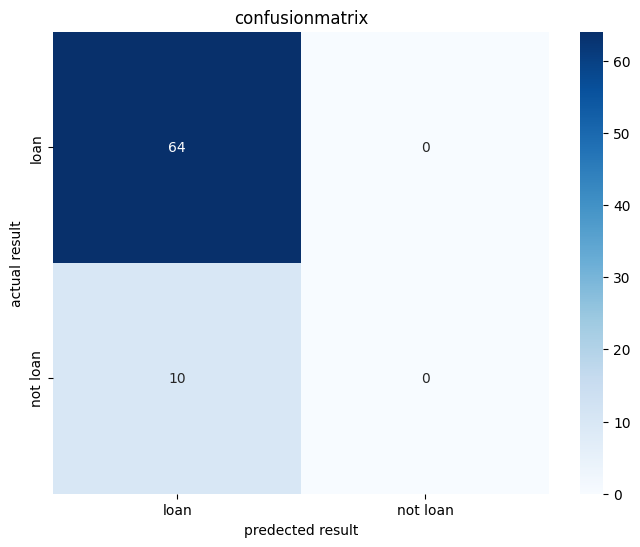

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['loan','not loan'], yticklabels=['loan','not loan'])
plt.xlabel('predected result')
plt.ylabel('actual result')
plt.title('confusionmatrix')
plt.show()

without outliers

In [47]:
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1

threshold = 1.5
outlier_indices = np.where((X_scaled < (Q1 - threshold * IQR)) | (X_scaled > (Q3 + threshold * IQR)))

print("Number of outliers detected:", len(outlier_indices))

Number of outliers detected: 2


In [50]:
X_cleaned = np.delete(X_scaled, outlier_indices[0], axis=0)
y_cleaned = np.delete(y, outlier_indices[0], axis=0)

print("Number of outliers removed:", len(outlier_indices[0]))

Number of outliers removed: 398


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       0.00      0.00      0.00         4

    accuracy                           0.82        22
   macro avg       0.41      0.50      0.45        22
weighted avg       0.67      0.82      0.74        22



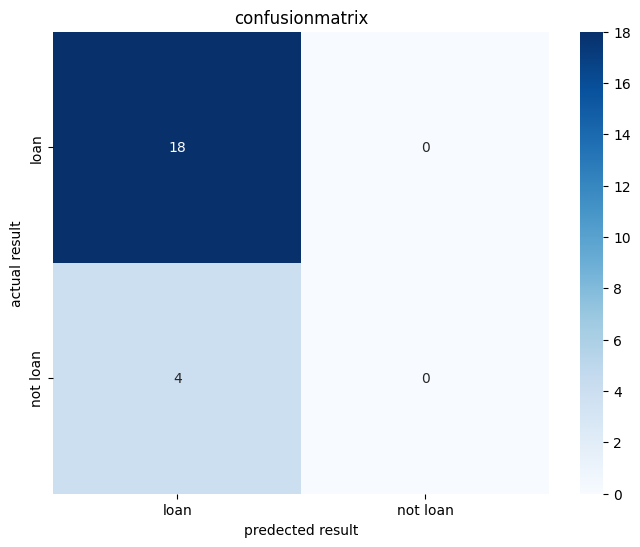

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['loan','not loan'], yticklabels=['loan','not loan'])
plt.xlabel('predected result')
plt.ylabel('actual result')
plt.title('confusionmatrix')
plt.show()